## 1- Depletion in semi infinite aquifer with fully penetrating stream (Glover and Balmer, 1954) 
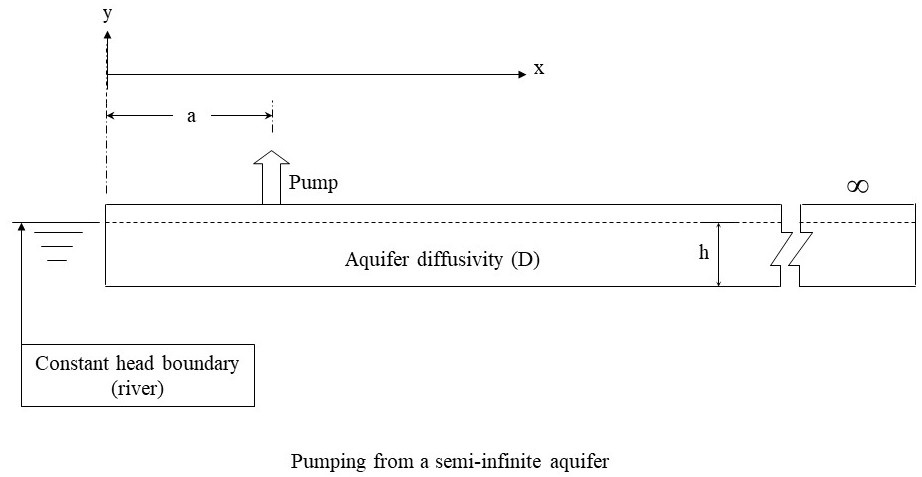

In [ ]:
## Glover and Balmer (1954)  solution
import numpy as np
import matplotlib.pyplot as plt
from StreamDepletion import gloverbalmer

## Input 
Diff = 10, 50, 1000                                          ## Aquifer diffusivity
a,  time_max, x = 100,1000, 3                                ## response for (x) different diffusivities 
## ----------------------------
t= np.linspace(1, time_max)
fig = plt.figure(figsize=(7, 4))
for i in range (x):
    D=Diff[i]
    Label="Diffusivity; D = "+"% s" %D
    sol = gloverbalmer.gloverbalmer(a,D,t)
    resp = sol.run()
    plt.plot(t,resp,label=Label)
plt.xlabel('Time (days)')
plt.ylabel('Depletion factor')
Title = "Glover and Balmer solution for differnt diffusivities"
plt.title(Title)
plt.grid(True)
plt.axis([ 0, time_max,0, 1])
text_1="Distance to river (a) = "+"% s" %a +" m"
plt.text(400,.83, text_1)
plt.legend(loc='best')
plt.show()

## 2- Depletion with semi-impervious layer (Hantush, 1965)
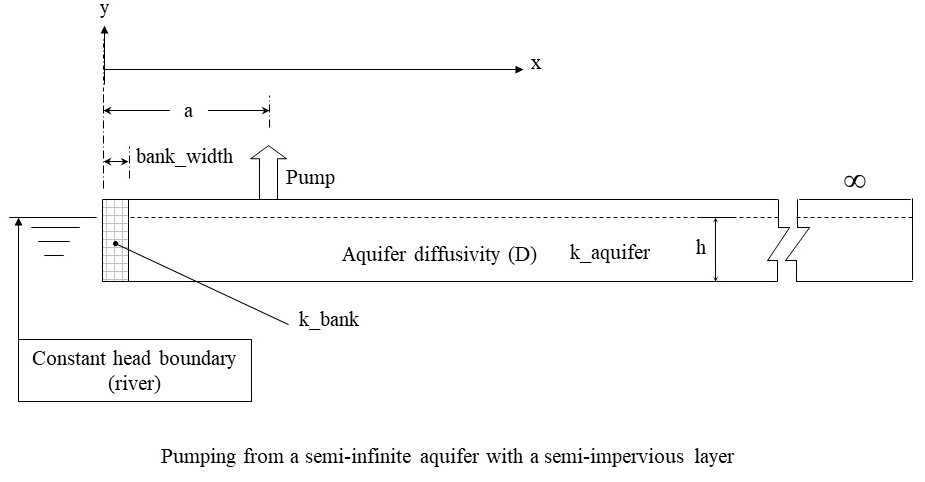

In [ ]:
## Hantush 1965 solution
import numpy as np
import matplotlib.pyplot as plt
from StreamDepletion import semipervious
from StreamDepletion import gloverbalmer

## Input 
# k_aquifer  = 100
# k_bank = 0.01
# bank_width = .75
## Alpha = k_aquifer / k_bank * bank_width  ## Calculate Alpha from basic parameters; when very small reverts back to Glover and Balmer solution

a, D, time_max, x =100, 1000, 1000, 3           ## response for (x) different alpha values
Alpha=10, 500, 1500                             ## Remove this line when calculating from basic parameters
resp  = np.zeros(time_max)
t= np.linspace(1, time_max, time_max)
fig = plt.figure(figsize=(8, 4))
for j in range (x):
    alpha=Alpha[j]
    Label="Alpha= "+"% s" %alpha+" m"
    sol = semipervious.semipervious(a, D, t, alpha)
    resp = sol.run()
    plt.plot(t, resp ,  label=Label)
plt.xlabel('Time (days)')
plt.ylabel('Depletion factor')
plt.title('Hantush depletion for differnt Alpha values')
plt.grid(True)
plt.axis([ 0, time_max,0, 1])
plt.legend(loc='best')

## Compare to Glover and Balmer; Show solution reverts back to Glover & Balmer for very low Alpha
Label = "Glover and Balmer solution; "+"Identical to Alpha=0"
gbsol = gloverbalmer.gloverbalmer(a,D,t)
gbresp = gbsol.run()
plt.plot(t, gbresp,  label=Label )
text_1="Distance to river (a) = "+"% s" %a +" m"
plt.text(400,.83, text_1)
plt.legend(loc='best')

## 3- Depletion with a no flow boundary (Knight et al, 2005)
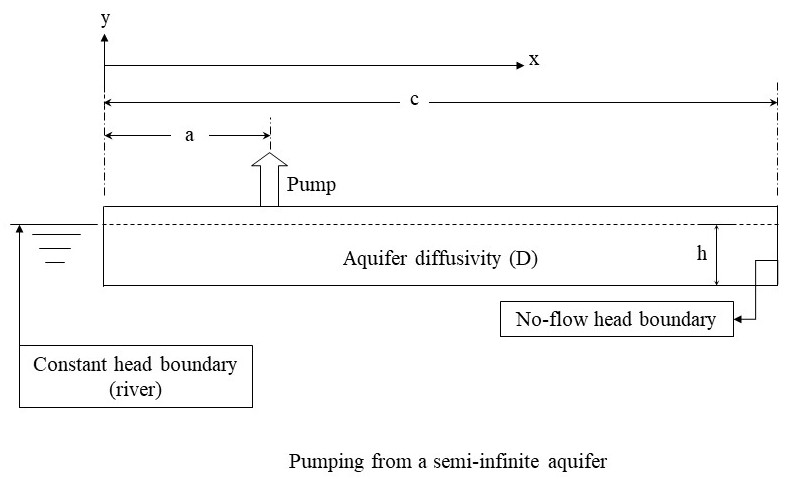

In [ ]:
## Knight et al. (2005) solution
import numpy as np
import matplotlib.pyplot as plt
from StreamDepletion import noflow 
from StreamDepletion import gloverbalmer

## --------------------------------------
## Input 
Dist_no_flow = 200, 300, 500                                   ## when very large, reverts back to Glover and Balmer              
Max_time, a, D, x = 1000, 100, 100, 3  ## response for (x) different distances to no flow boundary (c)
t = np.linspace(1, time_max, time_max)
## -------------------------------------

fig = plt.figure(figsize=(7, 4))
No_Flow_resp, time   = [np.zeros(Max_time) for _ in range(2)] 
for j in range (x):
    c=Dist_no_flow[j]
    Label="Distance to no-flow boundary; c= "+"% s" %c+" m"
    nfsol = noflow.noflow(a, D, t, c)
    resp = nfsol.run()
    plt.plot(t, resp,  label=Label)

## Compare to Glover and Balmer
gbsol = gloverbalmer.gloverbalmer(a,D,t)
gbresp = gbsol.run()
Label = "Glover and Balmer solution; " +"  (Identical to infinite c )"
plt.plot(t, gbresp,  label=Label )
plt.xlabel('Time (days)')
plt.ylabel('Depletion factor')
plt.title('Depletion for varous distances to no-flow boundary')
plt.grid(True)
plt.axis([ 0, Max_time,0, 1])
text_1="Distance to river (a) = "+"% s" %a +" m"
plt.text(400,.25, text_1)
plt.legend(loc='right')

## 4- Depletion for clogged partially penetrating stream (Hunt, 1999)
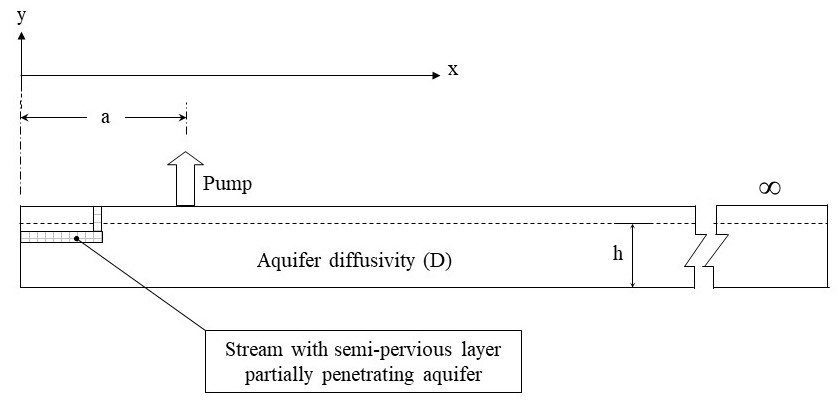

In [ ]:
## Hunt 1999 solution
import numpy as np
import matplotlib.pyplot as plt
from StreamDepletion import clogged
from StreamDepletion import gloverbalmer

## Input                                    
## K conductivity; phi sp. yield; h aquifer thickness; a distance to pump, x no of Lambda values 
K, phi, h, a, x = 50, 0.04, 37, 500, 3  
Lambda=100, 1000, 20000                    # when very large, reverts back to Glover and Balmer
## --------------------------------------------------------------

fig = plt.figure(figsize=(8, 4))
t = np.empty(64)  
D=K*h/phi*365                                               ## Calculate diffusivity 
for j in range (x):
    lam=Lambda[j]
    Label="Lambda = "+"% s" %lam
    for i in range(len(t)):
        t[i]=np.exp(0.25*i)/1000
    clsol = clogged.clogged(a, D, t, Lambda[j], phi)
    plt.plot(t, clsol.run(),  label=Label)
plt.xlabel('Time (years)')
plt.ylabel('Depletion factor')
plt.title('Depletion for varous Lambda values')
plt.grid(True)
plt.xscale("log")
plt.axis([ 0.001, 10000,0, 1])

## Compare to Glover and Balmer; Show solution reverts back to Glover & Balmer for very high Lambda
Label = "Glover and Balmer solution; " +"  (Identical to Infinite Lambda)"
gbsol = gloverbalmer.gloverbalmer(a,D,t)
gbresp = gbsol.run()
plt.plot(t, gbresp,  label=Label)
text_1="Distance to river (a) = "+"% s" %a +" m"
plt.text(11,.35, text_1)
plt.legend(loc='best')

## 5- Depletion in semi-confined aquifer (Hunt, 2003)

### Response vs non-dimensional time; replicates 4 time sries published in Hunt (2003) paper

### Response vs dimensional time; show special case when solution reverts to Glover and Balmer

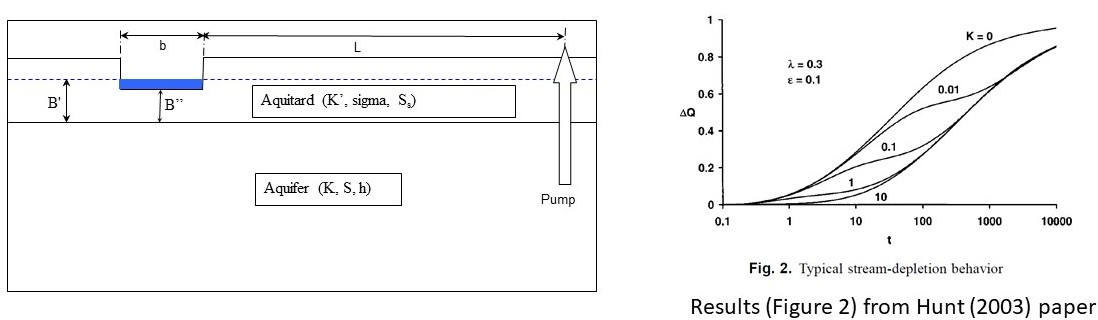

In [ ]:
## Hunt (2003) solution 
import numpy as np
import matplotlib.pyplot as plt
from StreamDepletion import semiconfined
from StreamDepletion import gloverbalmer
from StreamDepletion import commonfunctions as cf

## Input Basic aquifer parameters
L = 400 
aquifer_transmisivity = 300
Cond_aquitard = 1
Sat_aquitard_thick = 1
aquifer_storativity = 0.004
aquitard_porosity = 0.0001           ## yields very high 'eps' to compare with Glover and Balmer
stream_width = 10
aquitard_dep_below_stream = 0.1     ## yields very high 'lambda' to compare with Glover and Balmer
## -------------------------------------

Diff = cf.calculateDiff(aquifer_transmisivity,aquifer_storativity)
Response_time= L**2 / Diff
lambda_star = Cond_aquitard * stream_width / aquitard_dep_below_stream
K = L**2 / aquifer_transmisivity * Cond_aquitard /Sat_aquitard_thick    ## Calculate non-dimensional parameter 1
eps = aquifer_storativity / aquitard_porosity                           ## Calculate non-dimensional parameter 2
Lambda = L / aquifer_transmisivity * lambda_star                        ## Calculate non-dimensional parameter 3  

## use 3 sets of non-dimensional parameters
x=3 
## last values of 'epsilon' and 'lamb' are derived from basic parametersto show solution reverts to Glover-Balmer for high values
## first two values are selected randomly (the basic parameters should be varied, but this is for demo purposes)
epsilon=[0.1, 1, eps]  
lamb=[1, 5, Lambda]                                               
## ----------------------------------- 

time_max = 1000                                    
time= np.linspace(1, time_max,time_max) 
t = time/Response_time
plt.figure(1, figsize=(14, 4))
plt.subplot(1, 2, 1)  
 
for j in range(x):
    Eps=epsilon[j]
    Lamb=lamb[j]
    kk=round(K, 1)
    LLamb=round(lamb[j], 1)
    Label="\u03B5 =  " + "% s" %Eps + "  \u03BB =  " + "% s" %LLamb + " K =  " + "% s" %kk
    #Label= "\u03B5 = "+"% s" %Eps;  \u03B5 = "+"% s" %Lamb" "\u03B5 = 0.1; \u03BB
    scsol = semiconfined.semiconfined(t, K, Eps, Lamb)
    resp = scsol.run()
    plt.plot(time, resp, label=Label)
plt.xscale("log")
plt.xlabel('Time (days)')
plt.ylabel('Depletion factor')
plt.title('Response for dimensional time')
plt.grid(True)
plt.axis([ 1, 1000,0, 1])
text_1="When \u03B5 and \u03BB are very high"
text_2="Solution reverts to Glover and Balmer"
text_3="K becomes irrelevant"
plt.text(15,.55, text_1)
plt.text(15,.5, text_2)
plt.text(15,.45, text_3)
plt.legend(loc='best')

## Compare to Glover and Balmer; Show Hunt solution reverts back to Glover & Balmer for very high 'eps' and 'lambda'
Label = "Glover and Balmer solution"
a=L
gbsol = gloverbalmer.gloverbalmer(a,Diff,time)
gbresp = gbsol.run()
plt.scatter(time, gbresp,  color='r', label=Label,s=8 )
plt.legend( loc='lower right')
plt.show

####  ---------------------------------------------------------------------------------
####  THIS PART IS ADDED TO REPLICATE RESULTS BY HUNT (2003)

eps, Lambda, x = 0.1, 0.3, 4  ## parameters (eps, Lambda, K) are those used by Hunt (2003); response for (x) different k values               
K = 0, 0.01, 0.1, 10
time_steps=56                 ## 56 data points in an exponential function to reproduce time period used by Hunt

Non_dim_time  = np.zeros(time_steps)         ## store non-dimensional time series for plotting
response = np.zeros(time_steps) 
plt.figure(1, figsize=(14, 4))
plt.subplot(1, 2, 2)
for j in range (x):
    response  = np.zeros(time_steps)  
    k=K[j]                                        
    Label="K = "+"% s" %k                                          
    for i in range(time_steps):
        Non_dim_time[i]=np.exp(0.25*i)/10   ## create specific time series to correspond to time period used in Hunt (2003) paper
    h03sol=semiconfined.semiconfined(Non_dim_time, k, eps, Lambda)
    h03resp = h03sol.run()
    plt.plot(Non_dim_time, h03resp,  label=Label)
plt.xscale("log")
plt.xlabel('Dimensionless time')
plt.ylabel('Depletion factor')
plt.title('Published results in Hunt (2003) paper (Fig. 2)')
plt.grid(True)
plt.axis([ 0.1, 100000,0, 1])
plt.legend(loc='best')
text_1="\u03B5 = 0.1; \u03BB = 0.3"
plt.text(0.2,.5, text_1)
plt.show
####  ---------------------------------------------------------------------------------

## 6- Depletion in aquifer with two orthogonal rivers (Hantush, 1967)
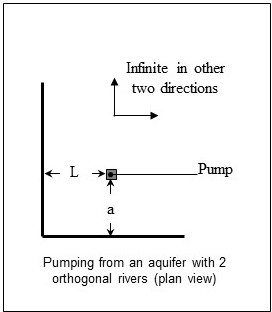

In [ ]:
## Hantush 1967 solution
import numpy as np
import matplotlib.pyplot as plt
from StreamDepletion import twoorthog
from StreamDepletion import gloverbalmer

## INPUT 
a, D, time_max, x = 100,100,1000, 3                           ## response for (x) different  distances to second river                                              
L_sec_river=200, 300, 700                                     ## when very large, reverts back to Glover and Balmer
## --------------------------------------------
fig = plt.figure(figsize=(7, 4))
t= np.linspace(1, time_max)   
for i in range (x):
    L=L_sec_river[i]
    lab="Distance to second river; L = "+"% s" %L +" m"
    twsol = twoorthog.twoorthog(a, D, t, L)
    plt.plot(t, twsol.run(),  label=lab)
plt.xlabel('Time (days)')
plt.ylabel('Depletion factor')
plt.title('Depletion for differnt distances to second river')
plt.grid(True)
plt.axis([ 0, time_max,0, 1])

## Compare to Glover and Balmer; Show solution reverts back to Glover & Balmer for very high distance to second river
Label = "Glover and Balmer solution; " +"  (Identical to Infinite L)"
gbsol = gloverbalmer.gloverbalmer(a,D,t)
resp = gbsol.run()
plt.plot(t, resp,  label=Label)
text_1="Distance to first river (a) = "+"% s" %a +" m"
plt.text(450,.65, text_1)
plt.legend(loc='best')

## 7- Depletion in aquifer with three orthogonal rivers (by John Knight; reported in Rassam et al (2004); http://www.clw.csiro.au/publications/technical2004/tr35-04.pdf
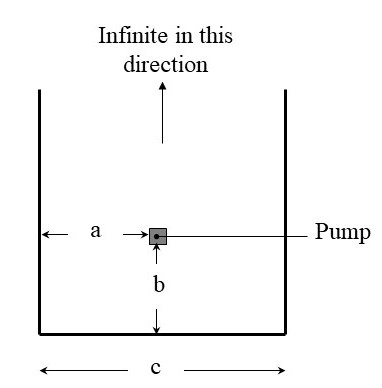

In [ ]:
## Depletion with 3 orthogonal rivers
import numpy as np
import matplotlib.pyplot as plt
from StreamDepletion import threeorthog
from StreamDepletion import twoorthog

## INPUT 
a, b, D, time_max, x = 100,200,100,1000, 3             ## response for (x) different  distances to second river                                              
c=100, 200, 100000                                     ## when very large, reverts back to Hantush (1967)
## --------------------------------------------
fig = plt.figure(figsize=(7, 4))
t= np.linspace(1, time_max)   
for i in range (x):
    C=c[i]
    lab="Distance to third river; c = "+"% s" %C +" m"
    thrsol = threeorthog.threeorthog(a, D, t, b, C)
    plt.plot(t, thrsol.run(),  label=lab)
plt.xlabel('Time (days)')
plt.ylabel('Depletion factor')
plt.title('Depletion for differnt distances to third river')
plt.grid(True)
plt.axis([ 0, time_max,0, 1])

## Compare to Hantush (1967); Show solution reverts back to Hantush (1967) for very high distance to third river (c)
Label = "Hantush (1967); " +" Identical to Infinite c"
twsol = twoorthog.twoorthog(a, D, t, b)
plt.scatter(t, twsol.run(), color='r', label=Label,s=8)
text_1="Distance to first river (a) = "+"% s" %a +" m"
text_2="Distance to second river (b) = "+"% s" %b +" m"
plt.text(450,.65, text_1)
plt.text(450,.55, text_2)
plt.legend(loc='best')

### 8- Flux distribution along the river (by John Knight, reported in Rassam et al. (2004); http://www.clw.csiro.au/publications/technical2004/tr35-04.pdf
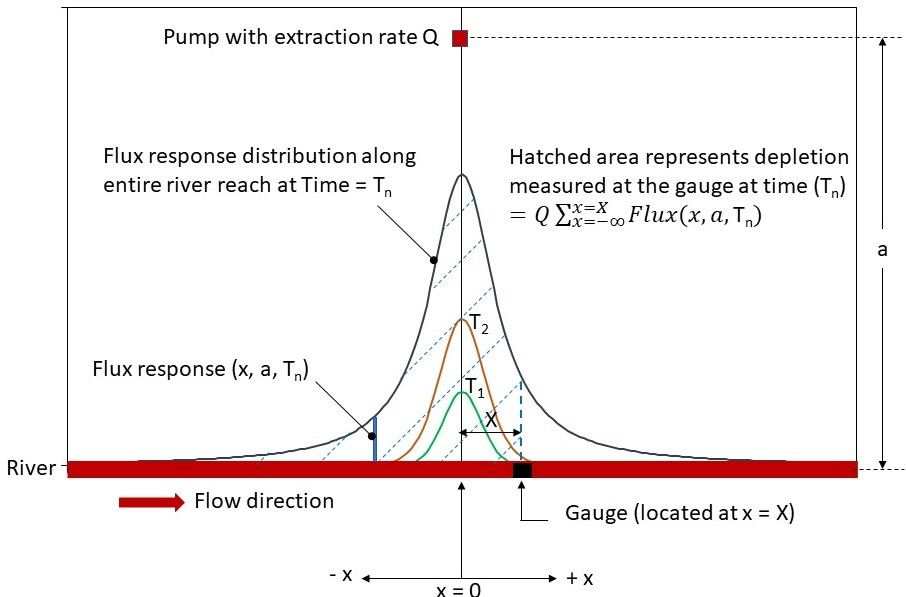


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from StreamDepletion import fluxdistribution
from StreamDepletion import gloverbalmer

## INPUT 
a,  D = 100, 50                                 # distance pump to river; aquifer diffusivity                                                  
x, y = 9, 4                                     # x number of times at which flux is calculated; y is number of gauge locations 
dL=1                                            # spacial step for intamtaneous flux calculation  
Time = [ 10, 30,60,100, 300, 1000, 10000, 100000, 1000000]   # last very large time, response approaches steady state
x_gauge = [-500, -100, 0,  10000]               # x coordinate of gauge locations (relative to pump, which is at x=0)
## 'mult' is multiplier of 'a' (to define the total river reach length for purposes of flux calculation)
## the river reach length is defined as a function of 'a' because the flux distribtion is very sensitive to 'a'
## very high value accounts for all the flux and results in Cumulative flux = 1 (at infinite time)
mult=200                                        # much higher value would lead to Cum. flux = 1  

## --------------------------------------------
Reach_L = mult * a                              # reach lenght along which fluxes are calculated (better be a function of 'a')

plt.figure(1, figsize=(20, 5))
plt.subplot(1, 2, 1)
fdsol = fluxdistribution.fluxdistribution(a, D, Time, Reach_L, dL)
flux = fdsol.run()
# calculate and round cumulative flux
# multiply instantaneous flux by step size
dlflux = flux * dL
cflux = np.round(np.sum(dlflux, 0), 3)
for i in range(len(Time)):
    t = Time[i]
    lab = "T = " + "% s" % t + " days; " + "Cum. resp. = " + "% s" % cflux[i]
    plt.plot(fdsol.xcoords, flux[i][0:fdsol.steps],  label=lab)
plt.xlabel('x-coor relative to pump location (m)')
plt.ylabel('Instantaneous flux response')
plt.title(
    'Flux response distribution along river & cumulative responses along entire reach')
plt.grid(True)
# plot only '10a' as curve flattens beyond it
plt.axis([-10*a, 10*a, 0, .005])
plt.text(-10*a+50, .004, "Pump located @ x=0")
plt.legend(loc='best')

## Plot flux distribution along the entire river reach and calculate cumulative flux responses, at various times
plt.figure(1, figsize=(20, 5))
plt.subplot(1, 2, 1) 


## Calculate and plot cumulative flux responses at each gauge at various times
plt.subplot(1, 2, 2) 
Sum = np.zeros((y, x))
for i in range (y):                                                 # loop gauges
    gauge_loc_index = int((fdsol.steps-1)/2+ x_gauge[i]/dL)               # index of x-coor where the gauge is
    N=i+1                                                           # for label
    x_gauge_coor=x_gauge[i]                                         # for label   
    lab="Gauge " + "% s" %N + "; x = " + "% s" %x_gauge_coor + "m"
    for j in range (x):                                             # loop times
        for k in range(0, gauge_loc_index):                         # loop x-coordinates
            Sum[i][j] += flux[j][k]*dL
    plt.plot(Time, Sum[i][0:x],  label=lab)
plt.xlabel('Time (days)')
plt.ylabel('Cumulative flux response')
plt.title('Cumulative flux response at various gauge locations relative to pump')
plt.grid(True)
plt.xscale("log")
plt.legend(loc='best')
plt.axis([Time[0], Time[x-1],0, 1])

## Show solution reverts back to Glover & Balmer along entire river reach (occurs at last gauge that is very far from the pump)
Label = "Glover and Balmer"
gbsol = gloverbalmer.gloverbalmer(a,D,Time)
plt.scatter(Time,gbsol.run() ,  color='black', label=Label,s=24)
plt.text(10000,0.7, "Gauge x-coor relative to pump location")
plt.legend(loc='best')



# Examples below use the Glover and Balmer solution to calculate depletion for various scenarios




###  9- Calculate probability to exceed threshold depletion for specific time and distance to river considering log-noramlly distributed aquifer dispersivities
Note that the distribution shown in the following cell is used for subsequent examples

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from StreamDepletion import gloverbalmer

## INPUT
mu, sigma = 3, .5                               # mean and standard deviation of lognormal distribution for diffusivity
samples, time, a, Pump_rate, Depletion_thresh = 1000, 1000, 100, 1000, 600
## -------------------------------------------
t= np.array(time)
Disp = np.random.lognormal(mu, sigma, samples)
gb = gloverbalmer.gloverbalmer(a,Disp,t)
resp = gb.run()
prob_exceed=np.count_nonzero(resp*Pump_rate > Depletion_thresh) / samples  
count, bins , ignored= plt.hist(Disp, 100, density=True)
plt.xlabel (r'Diffusivity ('  + '$\mathregular{m^{2}}$'+ "/day)")
plt.ylabel('Frequency')
plt.title('Uncertainty of aquifer diffusivity')
text_1="Probability to deplete river > " + "% s" %Depletion_thresh + " cu.m./day after "
text_2= "% s" %time + " days = " + "% s" %prob_exceed
plt.text(23,.05, text_1)
plt.text(23,.045, text_2)

###  10- Calculate probability to exceed threshold depletion as a function of distance to river at different times considering log-noramlly distributed aquifer dispersivities

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from StreamDepletion import gloverbalmer

## INPUT
Time = 1825, 3650, 5475                                     ## Time at which probability is calculated
max_distance, steps, x, samples = 1000, 200, 3, 10000 
mu, sigma = 3, .5                                           # mean and standard deviation for diffusivity (plotted above)
Pump_rate, Depletion_thresh = 1000, 250
## ----------------------------------------------------
distance_to_pump= np.linspace(50, max_distance,steps)
prob_exceed=np.zeros(steps)
Disp = np.random.lognormal(mu, sigma, samples)
fig = plt.figure(figsize=(7, 4))
for j in range (x):
    time=Time[j]
    t=int(time/365)
    Label="Time = "+"% s" %t+" years"
    for i in range (steps):
        a=distance_to_pump[i]
        gb = gloverbalmer.gloverbalmer(a,Disp,time)
        resp = gb.run()
        prob_exceed[i]=np.count_nonzero(resp*Pump_rate > Depletion_thresh) / samples
    plt.plot(distance_to_pump, prob_exceed, label=Label)
plt.xlabel('Distance from pump to river (m)')
plt.ylabel('Exceedence probability')
t=int(time/365)
Title = r'Probability to deplete river > '+"% s" %Depletion_thresh + '$\mathregular{m^{3}}$'+ "/day"
plt.grid(True)
plt.axis([ 0, max_distance,0, 1])
plt.legend(loc='best')
plt.title(Title)

###  11- Calculate probability to exceed threshold depletion as a function of time at different distances to river considering log-noramlly distributed aquifer dispersivities

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from StreamDepletion import gloverbalmer

## INPUT
distance_to_pump=100, 150, 200
max_time, steps, x, samples = 2000, 200, 3, 10000 
mu, sigma = 3, .5                                           # mean and standard deviation for diffusivity (plotted above)
Pump_rate, Depletion_thresh = 1000, 300
## ----------------------------------------------------
time= np.linspace(1, max_time, steps)
prob_exceed=np.zeros(steps)
Disp = np.random.lognormal(mu, sigma, samples)
fig = plt.figure(figsize=(7, 4))
for j in range (x):
    a=distance_to_pump[j]
    Label="Distance to pump = "+"% s" %a + " m"
    for i in range (steps):
        t=time[i]
        gb = gloverbalmer.gloverbalmer(a,Disp,t)
        resp = gb.run()
        prob_exceed[i]=np.count_nonzero(resp*Pump_rate > Depletion_thresh) / samples
    plt.plot(time, prob_exceed,label=Label)
plt.xlabel('Time (days)')
plt.ylabel('Exceedence probability')
Title = r'Probability to deplete river > '+"% s" %Depletion_thresh + '$\mathregular{m^{3}}$'+ "/day"
plt.grid(True)
plt.axis([ 0, max_time,0, 1])
plt.legend(loc='best')
plt.title(Title)

### 12- Calculate individual and cumulative depletion for multiple pumps using superposition; different distances to river and aquifer diffusivity, different pumping rates and starting times (defined by a delay period after the first)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from StreamDepletion import gloverbalmer

## INPUT
no_of_pumps=3
delay=0,200,500                    ## Pump1 starts immediately, Pump2 starts after 200 days, Pump3 starts after 500 days
dist_to_pump=100, 200, 300         ## Pump1 located @ 100m,     Pump2 located @ 200m,        Pump3 located @ 300m
pump_rate=200,500,1000
Diff=100, 200, 50
time_max=1000
## ---------------------------

Depletion = [[0 for i in range(time_max)] for j in range(no_of_pumps)]
Cumulative_depletion=np.zeros(time_max)
time_series= np.linspace(1, time_max,time_max)
fig = plt.figure(figsize=(8, 5))
for i in range(no_of_pumps):
    a=dist_to_pump[i]
    rate=pump_rate[i]
    D=Diff[i]
    start_time=delay[i]
    for j in range (start_time,time_max):
        t=j+1-start_time
        gb = gloverbalmer.gloverbalmer(a,D,t)
        resp = gb.run()
        Depletion[i][j]=rate*resp
    Cumulative_depletion +=  Depletion[i][0:time_max]
    Label="Depletion, Pump-"+"% s" %(i+1) + "; Distance=" + "% s" %a + "m" +"; Rate=" + "% s" %rate + '$\mathregular{m^{3}}$'+ "/day" + "; Diffusivity=" + "% s" %D + '$\mathregular{m^{2}}$'+ "/day"
    plt.plot(time_series, Depletion[i][0:time_max], label=Label)
plt.plot(time_series, Cumulative_depletion, label = "Cumulative depletion")
plt.xlabel('Time (days)')
plt.ylabel (r'Depletion ('  + '$\mathregular{m^{3}}$'+ "/day)")
plt.title('Individual and cumulative depletion; multiple pumps')
plt.grid(True)
plt.axis([ 0, time_max,0, 1000])
plt.legend(loc='best')

###  13- Calculate depletion for  scheduled pumping (single pump with time-variable rates) using superposition
(note that pumping schedule figure will not update for different inputs)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from StreamDepletion import gloverbalmer

## INPUT
time_max=1200
a=100
D=100
## Pumping rate starts at 100, changes to 500 at 200 days, changes to 0 at 400 days, changes to 700 at 700 days
schedule=4
rate=[ 100, 500, 0 , 700]
schedule_times=[0, 200, 400, 700]
## ----------------------------------

## Prepare data (Times, Rtaes) to plot pumping schedule (just for demo purposes)
Times=0,   schedule_times[1], schedule_times[1], schedule_times[2], schedule_times[2], schedule_times[3],schedule_times[3],time_max
Rates=rate[0], rate[0], rate[1], rate[1], rate[2],   rate[2], rate[3], rate[3]

## ---------------------------
Cum_depletion = np.zeros(time_max)
time_series= np.linspace(1, time_max,time_max)
pump_rate=np.zeros(schedule)
Depletion = [[0 for i in range(time_max)] for j in range(schedule)]

for i in range(schedule-1):                           ## calculate consecutive changes in pumping rates
    pump_rate[i+1]=rate[i+1]-rate[i]
pump_rate[0]=rate[0]

for i in range(schedule):
    start_time=int(schedule_times[i])
    rate=pump_rate[i]
    c=schedule_times[i]
    start_time=int(c)
    for j in range (start_time,time_max):
        t=j+1-start_time
        gb = gloverbalmer.gloverbalmer(a,D,t)
        resp = gb.run()
        Depletion[i][j]=rate*resp
    Cum_depletion += Depletion[i][0:time_max]
   
## Plot stream depletion
fig = plt.figure(figsize=(9, 5))
plt.plot(time_series, Cum_depletion)
plt.xlabel('Time (days)')
plt.ylabel (r'Depletion ('  + '$\mathregular{m^{3}}$'+ "/day)")
plt.title('Cumulative depletion for scheduled pumping')
plt.grid(True)
plt.axis([ 0, time_max,0, max(Cum_depletion)])
plt.show()

## Plot pumping schedule
plt.plot(Times, Rates, color='r')
plt.xlabel('Time (days)')
plt.ylabel (r'Pumping rate ('  + '$\mathregular{m^{3}}$'+ "/day)")
plt.title('Scheduled pumping rates')
plt.grid(True)
plt.axis([ 0, time_max,0, max(Rates)+100])
plt.show() 

### 14- Calculate cumulative depletion in a development due to multiple pumps where each pump is associated with: (1) different location, (2) different pumping rate schedule, (3) different aquifer diffusivity, (4) different activation time 

### Calculate volume depleted during a (user- defined) period

### Calculate total volume depleted by the development

(note that pumping schedule figures will not update for different inputs)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from StreamDepletion import gloverbalmer

## INPUT 
time_max=1000                                    ## Maximum simulation time 
no_pumps=3                                       ## number of pumps  
a=[100, 200, 300]                                 ## distances from pump to stream (for each pump)
Diff=100, 100, 100                               ## Aquifer diffusivity (for each pump)                               
delay_activate=[0, 200, 500]                     ## Time at which pump is activated; first pump starts at time 'zero'
schedule = [4, 4, 3]                             ## no. of changes in the shedule of each pump

## Note in 3 lines below: in each line, 'no. of arrays=no_pumps'; no. of elements in each array corresponds to 'a schedule'  

rate=[[ 100, 500, 0 , 700],[ 200, 300,  700, 200],[ 0, 200, 700]]## Schedule of pumping rates; last rate in schedule is permanent
pump_rate_change=[[100, 400, -500, 700], [200, 100, 400, -500], [0, 200,500]] ## calculate change as rate[i+1]-rate[i] (above)
schedule_times=[[0, 200, 400, 700],[0, 200, 400, 600], [0,200, 400]]          ## Scheduled pumping times (see demo figures)
Sum_period=30                                    ## Length of period volumes are summed over
## ---------------------------
    
Cum_depletion = [[0 for i in range(time_max)] for j in range(no_pumps)]       ## Cumulative depletion for each pumping schedule
Development_depletion=np.zeros(time_max)                   ## Cumulative develoment depletion accounting for delayed activation
time_series= np.linspace(1, time_max,time_max)                                ## Time series to plot results
Periods = int(time_max/Sum_period)                         ## if result is not interger, fraction will be dropped
Periods_count=np.linspace(1,Periods,Periods)
Periodical_sum=np.zeros(Periods)

for m in range(no_pumps):                                                     ## Loop over number of pumps
    Depletion = [[0 for b in range(time_max)] for bb in range(schedule[m])]   ## Initialize individual pump depletion
    D = Diff[m]
    for i in range(schedule[m]):                                              ## Loop over pumping schedule
        start_time=int(schedule_times[m][i])
        rate=pump_rate_change[m][i]
        c=schedule_times[m][i]
        start_time=int(c)        
        for j in range (start_time,time_max):                             ## Loop over time to estimate depletion time series
            t=j+1-start_time
            gb = gloverbalmer.gloverbalmer(a[m],D,t)
            resp = gb.run()
            Depletion[i][j]=rate*resp
            #Z = a[m] / np.sqrt(4 * D * t)
            #Depletion[i][j]=rate*special.erfc(Z)                          ## Apply Glover and Balmer solution
        for z in range(time_max):
            Cum_depletion[m][z] +=  Depletion[i][z]   ## Add depletion of pump schedule

for i in range (no_pumps):                        ## Calculate develoment depletion accounting for delayed pump activation
    start_time=delay_activate[i] 
    for j in range(start_time, time_max):
        Development_depletion[j] +=   Cum_depletion[i][j-start_time]
fig = plt.figure(figsize=(9, 5))
plt.plot(time_series, Development_depletion, color='black')               ## Plot depletion as function of time

plt.xlabel('Time (days)')
plt.ylabel (r'Depletion ('  + '$\mathregular{m^{3}}$'+ "/day)")
plt.title('Cumulative development depletion')
plt.grid(True)
plt.axis([ 0, time_max,0, max(Development_depletion)+100])
plt.arrow(x=0, y=750, dx=50, dy=0, width=8, facecolor='red', edgecolor='none')
plt.text(90, 750, "Pump-1 schedule activated immediately", color='red')
plt.arrow(x=200, y=650, dx=50, dy=0, width=8, facecolor='green', edgecolor='none')
plt.plot([200,200],[0,700],'--',  linewidth=1, color='g')
plt.text(290, 650, "Pump-2 schedule activated after 200 day", color='g')
plt.arrow(x=500, y=550, dx=50, dy=0, width=8, facecolor='blue', edgecolor='none')
plt.plot([500,500],[0,600],'--',  linewidth=1, color='b')
plt.text(590, 550, "Pump-3 schedule activated after 500 day", color='b')
plt.show()
np.savetxt('Cumulative_depletionx.txt', Development_depletion, delimiter=',')   ## Results checked with Excel calculations
                                                                         
                                                                    ## Plot pump schedules (works only for current input)
Times_1= 0, 200, 200, 400, 400, 700, 700, 1000
Rates_1= 100, 100, 500, 500, 0, 0, 700, 700
Times_2= 0, 200, 200, 400, 400, 600, 600, 1000
Rates_2= 200, 200, 300, 300, 700, 700, 200, 200
Times_3=  0,  200, 200, 400, 400, 1000
Rates_3= 0, 0, 200, 200, 700, 700
plt.figure(1, figsize=(18, 3))
plt.subplot(131)
plt.plot(Times_1, Rates_1, color='r')
plt.title('Pump-1 activated immediately')
plt.xlabel('Time (days)')
plt.ylabel(r'Pumping rate ('  + '$\mathregular{m^{3}}$'+ "/day)")
plt.axis([ 0, time_max,0, 800])
plt.grid(True)
plt.subplot(132)
plt.plot(Times_2, Rates_2, color='g')
plt.title('Pump-2 schedule activated after 200 days')
plt.xlabel('Time (days)')
plt.axis([ 0, time_max,0, 800])
plt.grid(True)
plt.subplot(133)
plt.plot(Times_3, Rates_3, color='b')
plt.title('Pump-3 schedule activated after 500 days')
plt.xlabel('Time (days)')
plt.axis([ 0, time_max,0, 800])
plt.grid(True)
plt.show()

## Calculate total volume depletion duinrg siulation time 'time_max' 
Sum=0
for i in range(time_max):                                 
    Sum += Development_depletion[i]
Sum=int(Sum/1000)

## Calculate volumes pumped during the specified period 'Sum_period'
for i in range(Periods):                                
    sum=0
    for j in range(Sum_period):
        sum += Development_depletion[i*Sum_period+j]
    Periodical_sum[i]=sum
fig = plt.figure(figsize=(9, 5))
plt.bar(Periods_count,Periodical_sum/1000)
plt.xlabel('Number of periods')
plt.ylabel (r'Volume depleted during '  + "% s" %Sum_period + "-day period (ML)")
plt.title ("Depletion volumes")
plt.grid(True)
plt.axis([ 0, Periods+2,0, max(Periodical_sum/1000)+2])
text_1="Total volume depleted during " +  "% s" %time_max + " days = " + "% s" %Sum + ' ML'
plt.text(1,21, text_1)